In [1]:
using LaTeXStrings
using HDF5
using PyPlot

using PyCall
using Photochemistry
using DataFrames
using DataFramesMeta



┌ Info: Precompiling Photochemistry [top-level]
└ @ Base loading.jl:1278


NOTICE: Parameter file in use is /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Code/PARAMETERS.jl


In [2]:
include("PARAMETERS.jl");

# Improving plots


## plotatm

In [47]:
logical_groups = Dict(2=>[:H, :H2, :H2O, :H2O2, :HO2, :HOCO, :D, :DO2, :DOCO, :HD, :HDO, :HDO2, :OH, :OD, 
                          :Hpl, :H2pl, :H2Opl, :H3pl, :H3Opl, :HO2pl, :HCO2pl, :Dpl, :DOCOpl, :HDpl, :HD2pl, :H2Dpl, :H2DOpl, :ODpl, :ArHpl, :ArDpl],
                      1=>[:C, :CH, :CO, :CO2, :HCO, :Ar, :O, :O1D, :O2, :O3, :N2, :Cpl, :CHpl, :CDpl, :COpl, :CO2pl, :HCOpl, :Arpl, :Opl, :O2pl],
                      3=>[:CN, :HCN, :HNO, :N, :N2O, :NH, :NH2, :NO, :NO2, 
                          :CNpl, :HCNpl, :HNOpl, :HCNHpl, :HN2Opl, :HOCpl, :Npl, :N2pl, :NHpl, :NH2pl, :NOpl, :NO2pl, :N2Opl, :NH3pl, :N_2Dpl, :NDpl])

axes_by_sp = Dict()

for k in keys(logical_groups)
    for sp in logical_groups[k]
        axes_by_sp[sp] = k
    end
end

In [63]:
function plotatm_improved(n_current, spclists, savepath; t=nothing, iter=nothing)
    #=
    Makes a "spaghetti plot" of the species concentrations by altitude in the
    atmosphere. 

    n_current: array of species densities by altitude
    spclists: a list of lists [neutrals, ions]
    savepath: path and name for saving resulting .png file
    t: timestep, for plotting the atmosphere during convergence
    iter: iteration, for plotting the atmosphere during convergence
    =#

    # Plot neutrals and ions together =========================================================
    if length(spclists)==2  # neutrals and ions 
        
        # set up the overall plot -------------------------------------------------------------
        atm_fig, atm_ax = subplots(2, 3, sharex=false, sharey=true, figsize=(16,6))
        subplots_adjust(wspace=0, hspace=0)
        tight_layout()
        coltitles = ["Primary species", "H- and D-bearing species", "N-bearing species"]
            
        # only the neutral-row axes
        atm_ax[1, 2].set_title("Neutrals")
        for i in 1:3
            atm_ax[1, i].set_xlim(1e-15, 1e18)
            atm_ax[1, i].tick_params(which="both", labeltop=true, top=true, labelbottom=false, bottom=true)
            atm_ax[1, i].set_title(coltitles[i])
        end
        
        # only the ion-row axes
        atm_ax[2, 2].set_title("Ions")
        for i in 1:3
            atm_ax[2, i].set_xlim(1e-15, 1e6)
            atm_ax[2, i].tick_params(which="both", labeltop=false, top=true, labelbottom=true, bottom=true)
            atm_ax[2, i].set_xlabel(L"Species concentration (cm$^{-3}$)")
        end
        
        # y axes labels
        for j in 1:2
            atm_ax[j, 1].set_ylabel("Altitude [km]")
        end
        
        # plot the neutrals according to logical groups -------------------------------------------------------
        for sp in spclists[1]
            atm_ax[1, axes_by_sp[sp]].plot(n_current[sp], alt[2:end-1]/1e5, color=get(speciescolor, sp, "black"),
                                           linewidth=2, label=sp, linestyle=get(speciesstyle, sp, "-"), zorder=1)
        end
        
        # plot the ions according to logical groups ------------------------------------------------------------
        for sp in spclists[2]
            atm_ax[2, axes_by_sp[sp]].plot(n_current[sp], alt[2:end-1]/1e5, color=get(speciescolor, sp, "black"),
                                           linewidth=2, label=sp, linestyle=get(speciesstyle, sp, "-"), zorder=1)
        end
        
        # stuff that applies to all axes - must be done here so legend fills
        for a in atm_ax
            plot_bg(a)
            a.set_ylim(0, zmax/1e5)
            a.set_xscale("log")
            a.legend(fontsize=8, )#bbox_to_anchor=[1.01,1], loc=2, borderaxespad=0)# for a limited-species plot: loc="lower left", fontsize=12)#
        end

    # Plot only neutrals - to support the fractionation factor project ==========================================
    elseif length(spclists)==1
        atm_fig, atm_ax = subplots(figsize=(16,6))
        tight_layout()
        for sp in spclists[1]
            atm_ax.plot(n_current[sp], alt[2:end-1]/1e5, color=get(speciescolor, sp, "black"),
                        linewidth=2, label=sp, linestyle=get(speciesstyle, sp, "-"), zorder=1)
            atm_ax.set_xlim(1e-15, 1e18)
            atm_ax.set_ylabel("Altitude [km]")
            atm_ax.set_title("Neutrals")
        end
        atm_ax.tick_params(which="both", labeltop=true, top=true)
        plot_bg(atm_ax)
        atm_ax.set_ylim(0, zmax/1e5)
        atm_ax.set_xscale("log")
        atm_ax.set_xlabel(L"Species concentration (cm$^{-3}$)")
        atm_ax.legend(bbox_to_anchor=[1.01,1], loc=2, borderaxespad=0, fontsize=8)# for a limited-species plot: loc="lower left", fontsize=12)#
    else
        throw("unexpected number of species lists to plot")
    end

    if t!=nothing && iter!=nothing
        suptitle("time=$(t), iter=$(iter)", y=1.1)
    else
        suptitle("Initial conditions", y=1.1)
    end

    atm_fig.savefig(savepath, bbox_inches="tight")
#     close(atm_fig)
    show()
end

plotatm_improved (generic function with 1 method)

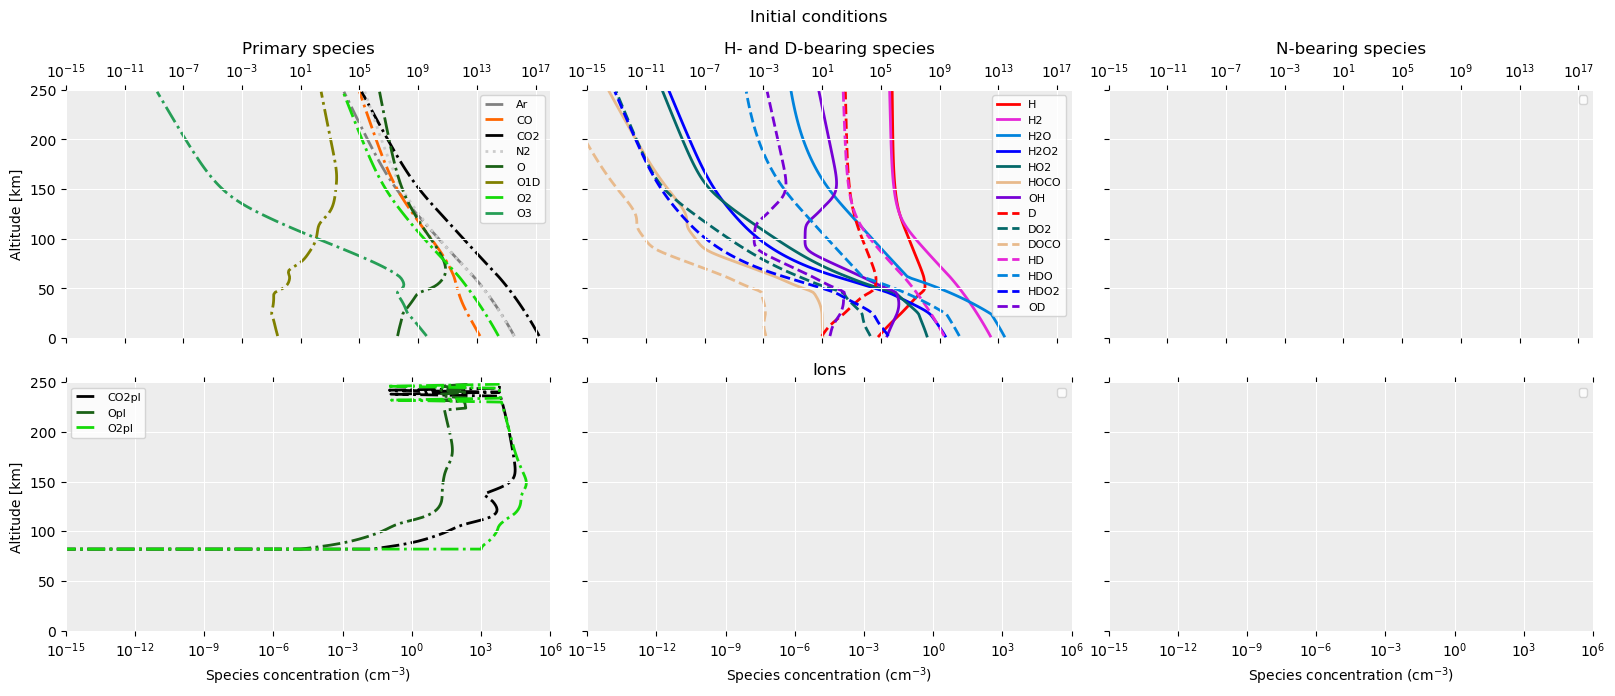

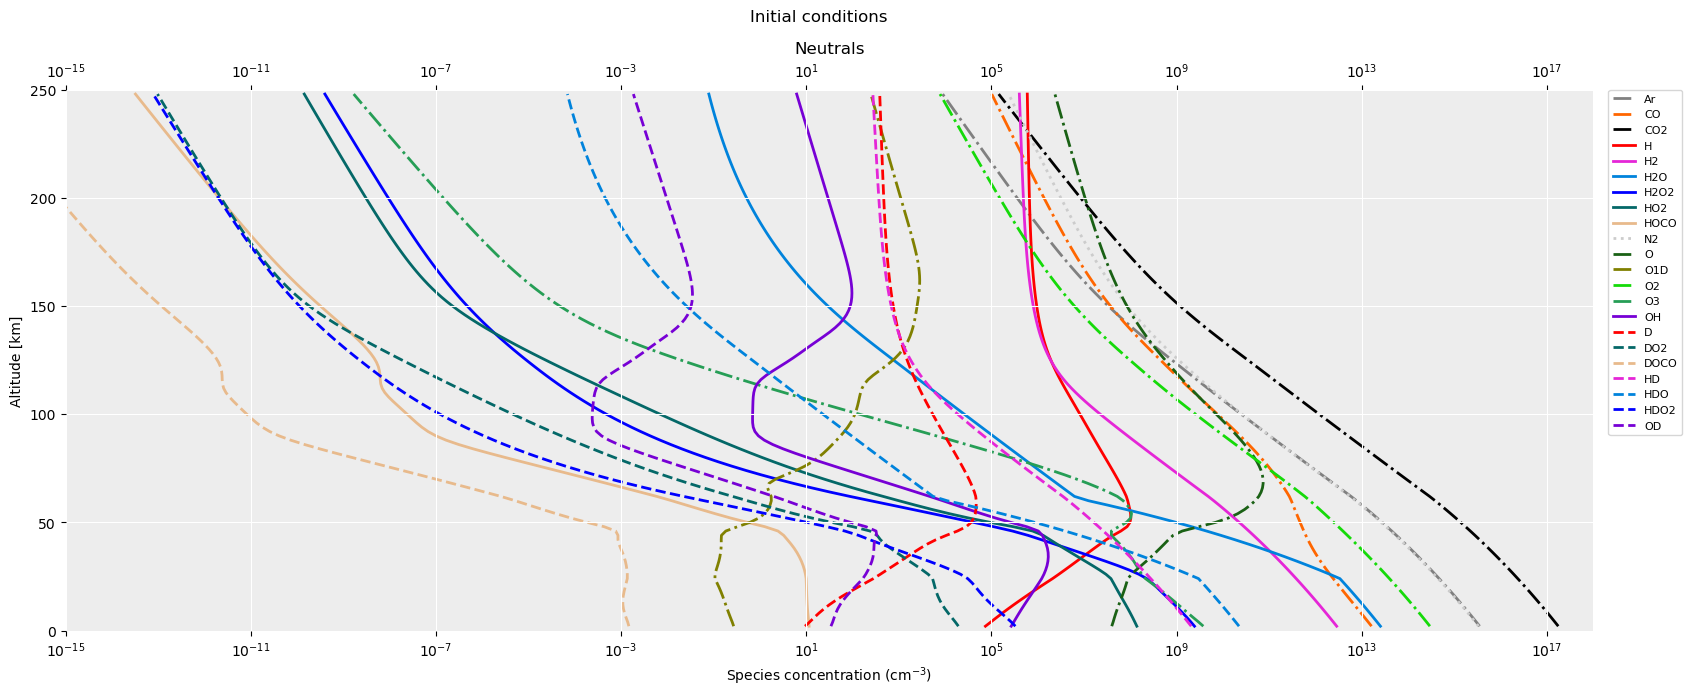

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [64]:
dummy_ncur = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/finally_worked/converged_temp_216_130_205.h5")

plotatm_improved(dummy_ncur, [neutrallist, ionlist], "/home/emc/GDrive-CU/Research-Modeling/testplots/plotatmtest_all.png")

plotatm_improved(dummy_ncur, [neutrallist], "/home/emc/GDrive-CU/Research-Modeling/testplots/plotatmtest_neutrals.png")

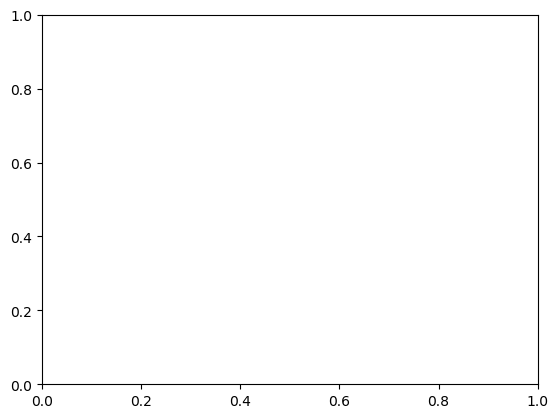

Any[]
false
Any[]


In [67]:
fig, ax = subplots()
handles, labels = ax.get_legend_handles_labels()
println(handles)
println(!isempty(handles))
println(labels)
show()

# Showing discrepancy in reaction rate coefficients for electron recombination between our model and KIDA

In [48]:
function co2pl_recomb(Te, who)
    #=
    who: me, nair, vuitton, or kida. 
    =#
    
    if who=="me"
        return 3.03e-5 .* (300 ./ Te) .^ (-0.75)
    elseif who=="me but flip the sign on B"
        return 3.03e-5 .* (300 ./ Te) .^ (0.75)
    elseif who=="nair"
        return fill(3.8e-7, length(Te))
    elseif who=="vuitton"
        return 4.2e-7 .* Te .^ (0.75)
    elseif who=="kida"
        return 4.2e-7 .* (Te ./ 300) .^ (-0.75)
    elseif who=="roger"
        return 2 * (3.03e-5) .* Te .^ (-0.75)
    end
end

function opl_recomb(Te, who)
    #=
    who: me, nair, vuitton, or kida. 
    =#
    
    if who=="me"
        return 1.4e-10 .* (300 ./ Te) .^ (-0.66)
    elseif who=="me but flip the sign on B"
        return 1.4e-10 .* (300 ./ Te) .^ (0.66)
    elseif who=="nair"
        return NaN
    elseif who=="vuitton"
        return 3.24e-12 .* Te .^ 0.66
    elseif who=="kida"
        return 3.4e-12 .* (Te ./ 300) .^ (-0.63)
    end
end
    
function o2pl_recomb(Te, who)
    #=
    who: me, nair, vuitton, or kida. 
    =#
    
    if who=="me"
        return 8.15e-6 .* (300 ./ Te) .^ (-0.65)
    elseif who=="me but flip the sign on B"
        return 8.15e-6 .* (300 ./ Te) .^ (0.65)
    elseif who=="nair"
        return 6.6e-5 .* (Te) .^ (-1)
    elseif who=="vuitton"
        return NaN
    elseif who=="kida"
        return 1.95e-7 .* (Te ./ 300) .^ (-0.7)
    end
end

o2pl_recomb (generic function with 1 method)

In [30]:
Temp_e(z::Float64) = T_all(z, 216., 130., 205., "electron")
temp_array = map(Temp_e, alt);

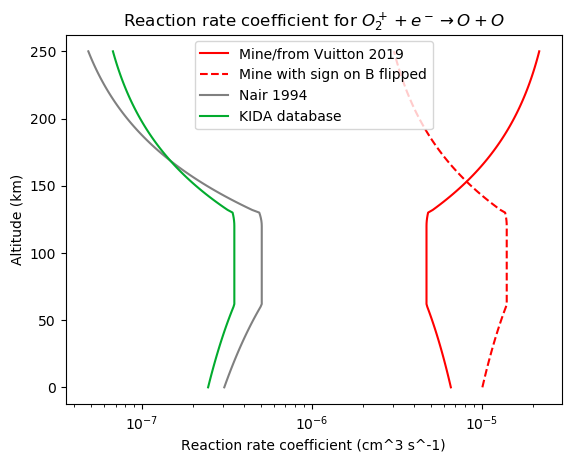

In [45]:
plot(o2pl_recomb(temp_array, "me"), alt./1e5, color="red", linestyle="-", label="Mine/from Vuitton 2019")
plot(o2pl_recomb(temp_array, "me but flip the sign on B"), alt./1e5, color="red", linestyle="--", label="Mine with sign on B flipped")
plot(o2pl_recomb(temp_array, "nair"), alt./1e5, color="gray", linestyle="-", label="Nair 1994")
plot(o2pl_recomb(temp_array, "kida"), alt./1e5, color="xkcd:kelly green", linestyle="-", label="KIDA database")

xscale("log")
xlabel("Reaction rate coefficient (cm^3 s^-1)")
ylabel("Altitude (km)")
title("Reaction rate coefficient for " * L"O_2^+ + e^- \rightarrow O + O")
legend()
show()

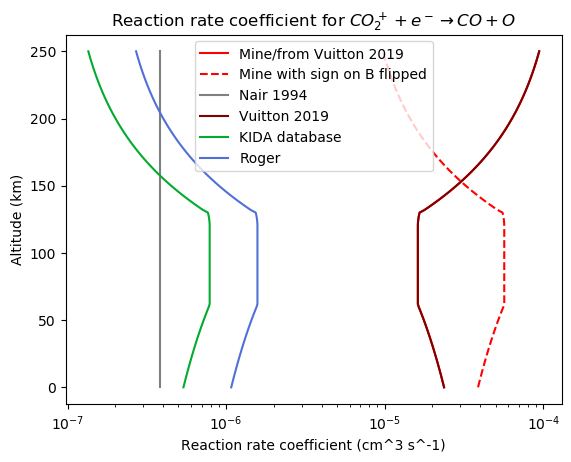

In [49]:
plot(co2pl_recomb(temp_array, "me"), alt./1e5, color="red", linestyle="-", label="Mine/from Vuitton 2019")
plot(co2pl_recomb(temp_array, "me but flip the sign on B"), alt./1e5, color="red", linestyle="--", label="Mine with sign on B flipped")
plot(co2pl_recomb(temp_array, "nair"), alt./1e5, color="gray", linestyle="-", label="Nair 1994")
plot(co2pl_recomb(temp_array, "vuitton"), alt./1e5, color="maroon", linestyle="-", label="Vuitton 2019")
plot(co2pl_recomb(temp_array, "kida"), alt./1e5, color="xkcd:kelly green", linestyle="-", label="KIDA database")
plot(co2pl_recomb(temp_array, "roger"), alt./1e5, color="xkcd:cornflower blue", linestyle="-", label="Roger")

xscale("log")
xlabel("Reaction rate coefficient (cm^3 s^-1)")
ylabel("Altitude (km)")
title("Reaction rate coefficient for " * L"CO_2^+ + e^- \rightarrow CO + O")
legend()
show()

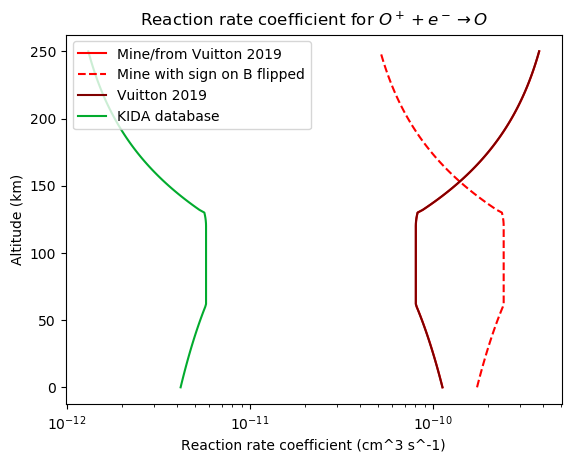

In [47]:
plot(opl_recomb(temp_array, "me"), alt./1e5, color="red", linestyle="-", label="Mine/from Vuitton 2019")
plot(opl_recomb(temp_array, "me but flip the sign on B"), alt./1e5, color="red", linestyle="--", label="Mine with sign on B flipped")
# plot(opl_recomb(temp_array, "nair"), alt./1e5, color="gray", linestyle="-", label="Nair 1994")  # Nair does'nt have this reaction
plot(opl_recomb(temp_array, "vuitton"), alt./1e5, color="maroon", linestyle="-", label="Vuitton 2019")
plot(opl_recomb(temp_array, "kida"), alt./1e5, color="xkcd:kelly green", linestyle="-", label="KIDA database")

xscale("log")
xlabel("Reaction rate coefficient (cm^3 s^-1)")
ylabel("Altitude (km)")
title("Reaction rate coefficient for " * L"O^+ + e^- \rightarrow O")
legend()
show()

# Tracking actual production and loss by transport

Suppose we have an array of net fluxes per cell where the sign of each cell indicates the direction of flow and the value indicates the total number of particles moving per cm^3, as happens in the code.

|&nbsp;-5&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp; i = 9 <br />
|&nbsp;-4&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp; i = 8 <br />
|&nbsp;-10&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp; i = 7  <br />
|&nbsp;+16&nbsp;&nbsp;| <br />
|&nbsp;+3&nbsp;&nbsp;| <br />
|&nbsp;+6&nbsp;&nbsp;| <br />
|&nbsp;-1&nbsp;&nbsp;| <br />
|&nbsp;-5&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp; i = 2 <br />
|&nbsp;+1&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp; i = 1 <br />

This array represents how things move. For instance, from the bottom cell i = 1, 1 # /cm³/s moves upwards, and from cell i = 2, 5 #/cm³/s move downwards. This means that the bottom cell i = 1 gains a net value of 4. Let's construct a new array that shows the resulting production and loss.

In [27]:
fluxarray = [1., -5., -1., 6., 3., 16., -10., -4., -5.]

PLarray = zeros((length(fluxarray)))

for i in range(1, stop=length(fluxarray))
    # Subtract the absolute value of the number in this cell from this cell, since it is definitely losing it, whichever way it goes:
    PLarray[i] -= abs(fluxarray[i])
    
    # Take the sign of this cell to determine whether we will add its value to the cell above (+) or the cell below (-):
    direction = sign(fluxarray[i])  # evaluates to either +1 or -1.
    println(Int(direction))
    println(i+Int(direction))
    
    # add the value in this cell to the specified cell, either i + 1 or i - 1:
    PLarray[i + Int(direction)] += abs(fluxarray[i])
end
println(PLarray)

1
2
-1
1
-1
2
1
5
1
6
1
7
-1
6
-1
7
-1
8
[4.0, -3.0, -1.0, -6.0, 3.0, -3.0, 10.0, 1.0, -5.0]


I checked this by hand and confirmed that it's working correctly, so we can go ahead and implement it to the code. Buuut I also think this means that my supplementary figure may be slightly wrong/misleading.

In [16]:
production_i = PLarray .>= 0
loss_i = PLarray .< 0
println(PLarray .* production_i)

[4.0, -0.0, -0.0, -0.0, 3.0, -0.0, 10.0, 1.0, -0.0]


In [20]:
println(abs.(PLarray) .* loss_i)

[0.0, 3.0, 1.0, 6.0, 0.0, 3.0, 0.0, 0.0, 5.0]


## Nicer version as a function that has error handling

In [40]:
# Another version with error control to handle cases where the bottom cell has a negative value or the top cell has a positive value.

function flux_to_real_production_and_loss(flux_array)
    PLarray = zeros((length(flux_array)))

    for i in range(1, stop=length(flux_array))
        # Take the sign of this cell to determine whether we will add its value to the cell above (+) or the cell below (-):
        direction = Int(sign(flux_array[i]))  # evaluates to either +1 or -1.

        # This block will only run so long as the code can index either the cell above or below if it needs to.

        # If the bottom cell wants flux to go down or if top cell wants flux to go up, index is out of bounds.
        direction_not_possible = (i + direction > length(PLarray) || i+direction < 1)

        if direction_not_possible
            # If the flux has nowhere to go, it has to stay in the cell it starts in.
            PLarray[i] += abs(flux_array[i])
            continue
        elseif !direction_not_possible  # i.e. if the direction is possible, proceed normally.
            PLarray[i] -= abs(flux_array[i]) # Abs value of cell value is definitely lost, whichever direction;
            PLarray[i + direction] += abs(flux_array[i])  # add that value to either cell above or below, depending on sign.
        end

    end
    return PLarray
end

flux_to_real_production_and_loss (generic function with 1 method)

In [41]:
f = [-1., -5., -1., 6., 3., 16., -10., 4., 5.]
flux_to_real_production_and_loss(f)

9-element Array{Float64,1}:
  6.0
 -4.0
 -1.0
 -6.0
  3.0
 -3.0
  6.0
 -4.0
  9.0

## Supposedly corrected version of getflux and production/loss

In [115]:
n_current = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/minimal_ionosphere_fluxx2/converged_temp_216_130_205.h5");

In [116]:
T_surf = 216.0
T_tropo = 130.0
T_exo = 205.0

Temp_n(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "neutral")
Temp_i(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "ion")
Temp_e(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "electron")
Temp_keepSVP(z::Float64) = T_all(z, meanTs, meanTt, meanTe, "neutral") # for testing temp without changing SVP. #TODO: adjust if needed for ions?


fix_SVP = true
H2Osat = map(x->Psat(x), map(Temp_keepSVP, alt))
HDOsat = map(x->Psat_HDO(x), map(Temp_keepSVP, alt))

# H2O Water Profile ============================================================
surface_watersat = Dict("H2O"=>H2Osat[1], "HDO"=>HDOsat[1])
H2Osatfrac = H2Osat./map(z->n_tot(n_current, z), alt)  # get SVP as fraction of total atmo
# set H2O SVP fraction to minimum for all alts above first time min is reached
H2Oinitfrac = H2Osatfrac[1:something(findfirst(isequal(minimum(H2Osatfrac)), H2Osatfrac), 0)]
H2Oinitfrac = [H2Oinitfrac;   # ensures no supersaturation
               fill(minimum(H2Osatfrac), num_layers-length(H2Oinitfrac))]

MR = MR_mean_water
H2Oinitfrac[findall(x->x<hygropause_alt, alt)] .= MR # 10 pr μm

for i in [1:length(H2Oinitfrac);]
    H2Oinitfrac[i] = H2Oinitfrac[i] < H2Osatfrac[i+1] ? H2Oinitfrac[i] : H2Osatfrac[i+1]
end

# HDO water profile ============================================================
HDOsatfrac = HDOsat./map(z->n_tot(n_current, z), alt)
# use D/H ratio to set population of HDO
HDOinitfrac = H2Oinitfrac * DH  # initial profile for HDO

H_veff = effusion_velocity(Temp_n(zmax), 1.0, zmax)
H2_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
D_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
HD_veff = effusion_velocity(Temp_n(zmax), 3.0, zmax)

global const speciesbclist=Dict(
                :CO2=>["n" 2.1e17; "f" 0.],
                :Ar=>["n" 2.0e-2*2.1e17; "f" 0.],
                :N2=>["n" 1.9e-2*2.1e17; "f" 0.],
                :H2O=>["n" H2Osat[1]; "f" 0.], # bc doesnt matter if H2O fixed
                :HDO=>["n" HDOsat[1]; "f" 0.],
                :O=>["f" 0.; "f" 1.2e8],
                :H2=>["f" 0.; "v" H2_veff],  # velocities are in cm/s
                :HD=>["f" 0.; "v" HD_veff],
                :H=>["f" 0.; "v" H_veff],
                :D=>["f" 0.; "v" D_veff],
                # TODO: Ion boundary conditions?
               );


## get_flux - fixed!


In [182]:
function get_flux(n_current, species, controltemps, speciesbclist)
    #=
    NEW VERSION : THIS IS THE BETTER VERSION NOW! But only for fluxes.
    
    Returns a 1D array of flux (#/cm²/s) for a given species at each boundary between layers of the
    atmosphere, including the extreme boundaries (at 1 km and 249 km) and the between-air-layers boundaries
    (3, 5...247 km).
    
    n_current: Array; species number density by altitude
    species: Symbol
    controltemps: [T_surf, T_tropo, T_exo] in use, which are needed for getting the transport coefficients.
    speciesbclist: the boundary condition dictionary.

    returns: Array of bulk flow values (#/cm³/s) at each altitude layer boundary.  
             i = 1 in the net_bulk_flow array corresponds to the boundary at 1 km,
             and the end of the array is the boundary at 249 km.
    =#
    
    # each element in thesecoefs has the format [downward flow (i to i-1), upward flow (i to i+1)]. 
    # units 1/s, 
    thesecoefs = [fluxcoefs(a, dz, species, n_current, controltemps) for a in non_bdy_layers] 

    bcs = boundaryconditions(species, dz, n_current, controltemps, speciesbclist)
    
    net_bulk_flow = fill(convert(Float64, NaN), length(alt)-1)  # units #/cm^3/s; tracks the cell boundaries, of which there are length(alt)-1

    # We will calculate the net flux across each boundary, with sign indicating direction of travel.
    # First boundary is the boundary between the surface layer and the first atmospheric layer (alt = 1 km)
    net_bulk_flow[1] = (bcs[1, 2]  # increase of the lowest atmospheric layer's density. Will always be 0 unless the species has a density or flux condition
                       - n_current[species][1]*bcs[1, 1]) # lowest atmospheric layer --> surface ("depositional" term)
                        
    for ialt in 2:num_layers  # now iterate through every cell boundary within the atmosphere. boundaries at 3 km, 5...247. 123 elements.
        net_bulk_flow[ialt] = (n_current[species][ialt-1]*thesecoefs[ialt-1][2]   # coming up from below: cell i-1 to cell i
                              - n_current[species][ialt]*thesecoefs[ialt][1])     # leaving to the layer below: downwards: cell i to cell i-1
    end

    # now the top boundary - between 124th atmospheric cell (alt = 249 km)
    net_bulk_flow[end] = (n_current[species][end]*bcs[2, 1] # into exosphere from the cell
                         - bcs[2, 2]) # into top layer from exosphere. do not question this
                
    return net_bulk_flow .* dz# now it is a flux. hurrah.
end

get_flux (generic function with 1 method)

## Compare Mike's getflux and the production/loss function i wrote for that to the new version

In [183]:
function getflux_old(n_current, species, controltemps, speciesbclist)
    #=
    OLD VERSION 
    Returns a 1D array of bulk flow (#/cm³/s) for a given species at each boundary between layers of the
    atmosphere, including the extreme boundaries (at 1 km and 249 km) and the between-air-layers boundaries
    (3, 5...247 km).
    
    n_current: Array; species number density by altitude
    species: Symbol
    controltemps: [T_surf, T_tropo, T_exo] in use, which are needed for getting the transport coefficients.
    speciesbclist: the boundary condition dictionary.

    returns: Array of bulk flow values (#/cm³/s) at each altitude layer boundary.  
             i = 1 in the net_bulk_flow array corresponds to the boundary at 1 km,
             and the end of the array is the boundary at 249 km.
    =#
    
    # each element in thesecoefs has the format [downward, upward]
    thesecoefs = [fluxcoefs(a, dz, species, n_current, controltemps) for a in alt[2:end-1]]

    # thesebcs has the format [lower bc; upper bc], where each row contains a 
    # character showing the type of boundary condition, and a number giving its value
    thesebcs = boundaryconditions(species, dz, n_current, controltemps, speciesbclist)

    thesefluxes = fill(convert(Float64, NaN),length(intaltgrid))

    # in the following line for the lowest layer: 
    # first term is -(influx from layer above - outflux from this layer)
    # second term is (-this layer's lower bc that depends on concentration + bc that doesn't depend on concentration)
    thesefluxes[1] = (-(n_current[species][2]*thesecoefs[2][1]  # in from layer above
                        -n_current[species][1]*thesecoefs[1][2]) # out to layer above
                    +(-n_current[species][1]*thesebcs[1, 1] # out to boundary layer
                      +thesebcs[1, 2]))/2.0 # in from the boundary layer
    for ialt in 2:length(intaltgrid)-1
        thesefluxes[ialt] = (-(n_current[species][ialt+1]*thesecoefs[ialt+1][1]  # coming in from above
                               -n_current[species][ialt]*thesecoefs[ialt][2])    # leaving out to above layer
                             +(-n_current[species][ialt]*thesecoefs[ialt][1]     # leaving to the layer below
                               +n_current[species][ialt-1]*thesecoefs[ialt-1][2]))/2.0  # coming in from below
    end
    thesefluxes[end] = (-(thesebcs[2, 2]
                          - n_current[species][end]*thesebcs[2, 1])
                        + (-n_current[species][end]*thesecoefs[end][1]
                           +n_current[species][end-1]*thesecoefs[end-1][2]))/2.0
    return dz*thesefluxes
end

getflux_old (generic function with 1 method)

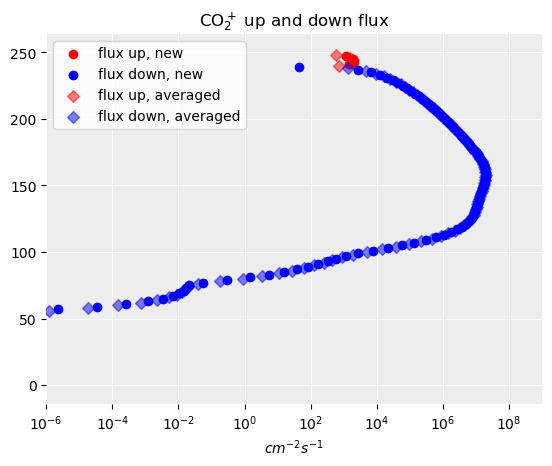

In [187]:
# My new get flux function
arr_new = get_flux(n_current, :CO2pl, [T_surf, T_tropo, T_exo], speciesbclist)
production_i = arr_new .>= 0
loss_i = arr_new .< 0
total_flux_up_new = production_i .* arr_new;
total_flux_down_new = loss_i .* abs.(arr_new);

arr_old = getflux_old(n_current, :CO2pl, [T_surf, T_tropo, T_exo], speciesbclist)  # convert to a bulk flow
# now separate into two different arrays for ease of addition.
production_i = arr_old .>= 0
loss_i = arr_old .< 0
total_flux_up_old = production_i .* arr_old;
total_flux_down_old = loss_i .* abs.(arr_old);


fig, ax = subplots()
plot_bg(ax)
scatter(total_flux_up_new, 1:2:249, color="red", zorder=5, label="flux up, new")
scatter(total_flux_down_new, 1:2:249, color="blue", zorder=5, label="flux down, new")
scatter(total_flux_up_old, plot_grid, color="red", alpha=0.5, marker="D", zorder=5, label="flux up, averaged")
scatter(total_flux_down_old, plot_grid, color="blue", alpha=0.5, marker="D", zorder=5, label="flux down, averaged")
xscale("log")
legend()
xlabel(L"cm^{-2}s^{-1}")
xlim(1e-6, 1e9)
title("CO"*L"_2^+" * " up and down flux")
show()


In [185]:
function get_transport_production_and_loss_rate(n_current, species, controltemps, speciesbclist)
    #=
    THIS SHOULD BE CORRECT 11 Feb per Mike
    
    Returns a 1D array of production and loss by transport for a given species at each boundary between layers of the
    atmosphere, including the extreme boundaries (at 1 km and 249 km) and the between-air-layers boundaries
    (3, 5...247 km).
    
    n_current: Array; species number density by altitude
    species: Symbol
    controltemps: [T_surf, T_tropo, T_exo] in use, which are needed for getting the transport coefficients.
    speciesbclist: the boundary condition dictionary.

    returns: Array of production and loss (#/cm³/s) at each altitude layer boundary.  
             i = 1 in the net_bulk_flow array corresponds to the boundary at 1 km,
             and the end of the array is the boundary at 249 km.
    =#
    
    # each element in thesecoefs has the format [downward, upward]
    thesecoefs = [fluxcoefs(a, dz, species, n_current, controltemps) for a in alt[2:end-1]]

    # thesebcs has the format [lower bc; upper bc], where each row contains a 
    # character showing the type of boundary condition, and a number giving its value
    thesebcs = boundaryconditions(species, dz, n_current, controltemps, speciesbclist)

    transport_PL = fill(convert(Float64, NaN),length(intaltgrid))

    # These are the derivatives, which should be what we want (check math)
    transport_PL[1] = ((n_current[species][2]*thesecoefs[2][1]  # in from layer above
                        -n_current[species][1]*thesecoefs[1][2]) # out to layer above
                    +(-n_current[species][1]*thesebcs[1, 1] # out to boundary layer
                      +thesebcs[1, 2])) # in from the boundary layer
    for ialt in 2:length(intaltgrid)-1
        transport_PL[ialt] = ((n_current[species][ialt+1]*thesecoefs[ialt+1][1]  # coming in from above
                               -n_current[species][ialt]*thesecoefs[ialt][2])    # leaving out to above layer
                             +(-n_current[species][ialt]*thesecoefs[ialt][1]     # leaving to the layer below
                               +n_current[species][ialt-1]*thesecoefs[ialt-1][2]))  # coming in from below
    end
    transport_PL[end] = ((thesebcs[2, 2]
                          - n_current[species][end]*thesebcs[2, 1])
                        + (-n_current[species][end]*thesecoefs[end][1]
                           +n_current[species][end-1]*thesecoefs[end-1][2]))
    return transport_PL
end

get_transport_production_and_loss_rate (generic function with 1 method)

In [181]:
arr_CO2pl_PL = get_transport_production_and_loss_rate(n_current, :CO2pl, [T_surf, T_tropo, T_exo], speciesbclist)


124-element Array{Float64,1}:
  4.6131224810733656e-184
  5.5366095725022516e-176
  5.57865434218986e-168
  4.708823472114378e-160
  3.3222168725115766e-152
  1.9547212652562467e-144
  9.568945313338624e-137
  3.887926424453244e-129
  1.3078834801893547e-121
  3.6333555273473345e-114
  8.313654011513617e-107
  1.5625825108778904e-99
  2.405723139995315e-92
  ⋮
 -0.08560374371427315
 -0.0669675432322947
 -0.05156083437395864
 -0.038865492097102106
 -0.028442764438295853
 -0.019921658692055644
 -0.01298891642363742
 -0.007380387022749346
 -0.0028736246940752608
  0.0007184497576417925
  0.003552964240043366
  0.005761713594893081

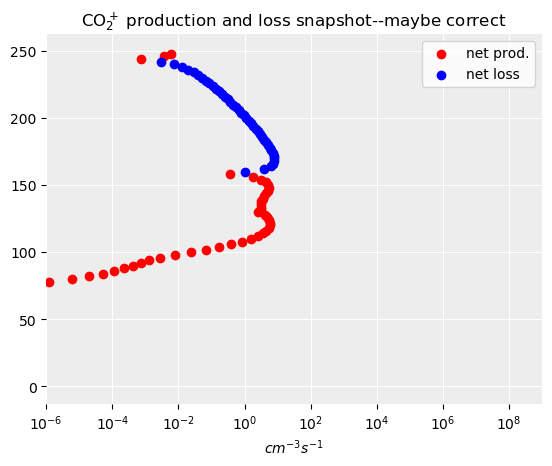

In [173]:
# now separate into two different arrays for ease of addition.
production_i = arr_CO2pl_PL .>= 0
loss_i = arr_CO2pl_PL .< 0
total_transport_prod_old = production_i .* arr_CO2pl_PL;
total_transport_loss_old = loss_i .* abs.(arr_CO2pl_PL);

fig, ax = subplots()
plot_bg(ax)
# scatter(arr_old, plot_grid)
scatter(total_transport_prod_old, plot_grid, color="red", zorder=5, label="net prod.")
scatter(total_transport_loss_old, plot_grid, color="blue", zorder=5, label="net loss")
xscale("log")
legend()
xlabel(L"cm^{-3}s^{-1}")
xlim(1e-6, 1e9)
title("CO"*L"_2^+" * " production and loss snapshot--maybe correct")
show()

# this should balance with chemical stuff.

## Let's do that but for H

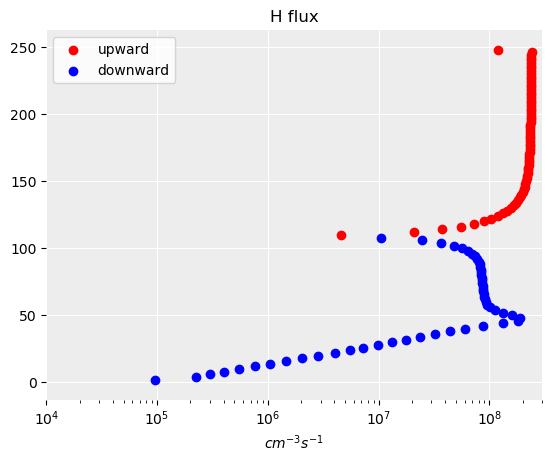

[2.3915903678536415e8, 2.3935295164734125e8, 2.3954952143207192e8, 2.3974888882488012e8, 2.3995118576437235e8, 2.4015653263777494e8, 1.2012999143004417e8]

In [139]:
arr_H = getflux_old(n_current, :H, [T_surf, T_tropo, T_exo], speciesbclist)    # convert to a bulk flow
print(arr_H[end-6:end])
# now separate into two different arrays for ease of addition.
production_i = arr_H .>= 0
loss_i = arr_H .< 0
total_transport_prod_old = production_i .* arr_H;
total_transport_loss_old = loss_i .* abs.(arr_H);


fig, ax = subplots()
plot_bg(ax)
# scatter(arr_old, plot_grid)
scatter(total_transport_prod_old, plot_grid, color="red", zorder=5, label="upward")
scatter(total_transport_loss_old, plot_grid, color="blue", zorder=5, label="downward")
xscale("log")
legend()
xlabel(L"cm^{-3}s^{-1}")
xlim(1e4, 3e8)
title("H flux")
show()

# Calling plot_rxns after the simulation has finished

In [2]:
# Load the minimum stuff we need to establish speciesbclist, which is necessary for plot_rxns and such
global T_surf = meanTs
global T_tropo = meanTt
global T_exo = meanTe
Temp_n(z::Float64) = T_all(z, meanTs, meanTt, meanTe, "neutral")
H2Osat = map(x->Psat(x), map(Temp_n, alt)) # array in #/cm^3 by altitude
HDOsat = map(x->Psat_HDO(x), map(Temp_n, alt))

H_veff = effusion_velocity(Temp_n(zmax), 1.0, zmax)
H2_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
D_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
HD_veff = effusion_velocity(Temp_n(zmax), 3.0, zmax)

global const speciesbclist=Dict(
                :CO2=>["n" 2.1e17; "f" 0.],
                :Ar=>["n" 2.0e-2*2.1e17; "f" 0.],
                :N2=>["n" 1.9e-2*2.1e17; "f" 0.],
                :H2O=>["n" H2Osat[1]; "f" 0.], # bc doesnt matter if H2O fixed
                :HDO=>["n" HDOsat[1]; "f" 0.],
                :O=>["f" 0.; "f" 1.2e8],
                :H2=>["f" 0.; "v" H2_veff],  # velocities are in cm/s
                :HD=>["f" 0.; "v" HD_veff],
                :H=>["f" 0.; "v" H_veff],
                :D=>["f" 0.; "v" D_veff],
                # TODO: Ion boundary conditions?
               );

In [ ]:
ncur = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/converged_temp_216_130_205.h5")

for sp in fullspecieslist
   plot_rxns(sp, ncur, [T_surf, T_tropo, T_exo], speciesbclist, subfolder="all_new_species_converged/chemeq_plots/", num="final", extra_title="converged")
end

In [3]:
ncur = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/converged_temp_216_130_205.h5")

for sp in fullspecieslist
   plot_rxns(sp, ncur, [T_surf, T_tropo, T_exo], speciesbclist, subfolder="temp_216_130_205/chemeq_plots/", num="final", extra_title="converged")
end

  0.042773 seconds (104.44 k allocations: 6.813 MiB)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_Ar_final.png
  2.910095 seconds (16.51 M allocations: 762.724 MiB, 8.11% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_CO_final.png
  0.560309 seconds (2.26 M allocations: 124.918 MiB, 3.33% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_CO2_final.png
  3.013781 seconds (14.53 M allocations: 690.668 MiB, 5.90% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_H_final.png
  1.232529 seconds (4.53 M allocations: 233.161 MiB, 3.85% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_H2_final.png
  0.762503 seconds (2.99 M allocations: 167.397 

In [5]:
ncur = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/final_atm.h5")

for sp in fullspecieslist
   plot_rxns(sp, ncur, [T_surf, T_tropo, T_exo], speciesbclist, subfolder="temp_216_130_205/chemeq_plots/", num="final")
end

  0.041405 seconds (92.94 k allocations: 6.270 MiB)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_Ar_final.png
  1.774771 seconds (6.82 M allocations: 325.809 MiB, 3.11% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_CO_final.png
  0.757226 seconds (2.26 M allocations: 124.913 MiB, 2.28% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_CO2_final.png
  2.361339 seconds (7.99 M allocations: 395.010 MiB, 2.98% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_H_final.png
  1.463798 seconds (4.35 M allocations: 223.930 MiB, 3.16% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/chemeq_plots/chem_rates_H2_final.png
  1.146552 seconds (2.99 M allocations: 167.424 MiB

In [7]:
ncur = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/free_water/free_water.h5")

for sp in fullspecieslist
   plot_rxns(sp, ncur, [T_surf, T_tropo, T_exo], speciesbclist, subfolder="free_water/chemeq_plots/", num="final")
end

  0.440966 seconds (92.94 k allocations: 6.270 MiB, 84.99% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/free_water/chemeq_plots/chem_rates_Ar_final.png
  2.101982 seconds (6.82 M allocations: 325.743 MiB, 3.39% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/free_water/chemeq_plots/chem_rates_CO_final.png
  1.043469 seconds (2.26 M allocations: 124.913 MiB, 2.92% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/free_water/chemeq_plots/chem_rates_CO2_final.png
  2.781244 seconds (7.99 M allocations: 395.010 MiB, 3.11% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/free_water/chemeq_plots/chem_rates_H_final.png
  1.756019 seconds (4.35 M allocations: 223.930 MiB, 3.05% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/free_water/chemeq_plots/chem_rates_H2_final.png
  1.501103 seconds (2.99 M allocations: 167.393 MiB, 2.79% gc tim

# correcting regular expression to find species in make_ratexdensity

In [11]:
species = :H

species_re = r"\b"*string(species)*r"\b"

println(occursin(species_re, string([:H2O2])) || occursin(species_re, string([:OH, :OH])))
println(occursin(species_re, string([:H2O2])) || occursin(species_re, string([:HO2, :H])))
println(occursin(species_re, string([:H2O])) || occursin(species_re, string([:Opl, :H2])))

false
true
false


# Improving speed of make_ratexdensity

In [3]:
ncur = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/converged_temp_216_130_205.h5");

In [3]:
for sp in fullspecieslist
   @time plot_rxns(sp, ncur, [T_surf, T_tropo, T_exo], speciesbclist, subfolder="all_new_species_converged/chemeq_plots/", num="final", extra_title="converged")
end

Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/chemeq_plots/chem_rates_Ar_final.png
  9.477861 seconds (13.95 M allocations: 726.218 MiB, 3.63% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/chemeq_plots/chem_rates_CO_final.png
  8.943719 seconds (35.43 M allocations: 1.708 GiB, 4.70% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/chemeq_plots/chem_rates_CO2_final.png
  3.059401 seconds (7.62 M allocations: 392.554 MiB, 2.46% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/chemeq_plots/chem_rates_H_final.png
 25.955177 seconds (105.82 M allocations: 5.229 GiB, 4.45% gc time)
Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/chemeq_plots/chem_rates_H2_final.png
  8.362120 seconds (27.51 M allocations: 1.407 GiB, 3.03% 

In [3]:
@time plot_rxns(:H, ncur, [T_surf, T_tropo, T_exo], speciesbclist, subfolder="all_new_species_converged/junkfolder/", num="testingspeedonly")

make_ratexdensity for production
time to loop through the network and build rxn_dat within make_ratexdensity:
 15.383571 seconds (68.39 M allocations: 3.309 GiB, 5.91% gc time)
 17.015626 seconds (69.67 M allocations: 3.372 GiB, 5.51% gc time)

make_ratexdensity for loss
time to loop through the network and build rxn_dat within make_ratexdensity:
 11.933375 seconds (43.40 M allocations: 2.200 GiB, 3.61% gc time)
 11.967104 seconds (43.49 M allocations: 2.203 GiB, 3.60% gc time)

Trying to do /home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/all_new_species_converged/junkfolder/chem_rates_H_testingspeedonly.png
 36.065702 seconds (124.02 M allocations: 6.112 GiB, 4.19% gc time)


In [3]:
testrxns = [   #Photodissociation
             [[:CO2], [:CO, :O], :JCO2toCOpO],
             [[:O2], [:O, :O], :JO2toOpO],

             # recombination of O
             [[:O, :O, :M], [:O2, :M], :(1.8 .* 3.0e-33 .* (300 ./ Tn) .^ 3.25)],
           ]

3-element Array{Array{Any,1},1}:
 [[:CO2], [:CO, :O], :JCO2toCOpO]
 [[:O2], [:O, :O], :JO2toOpO]
 [[:O, :O, :M], [:O2, :M], :((1.8 .* 3.0e-33) .* (300 ./ Tn) .^ 3.25)]

In [4]:
function make_ratexdensity_comprehensions(n_current, controltemps, speciesbclist; species=Nothing, species_role="both", which="all")
    
    function rxndat_photodiss(filtered_list)
        # photodissociation
        reactants_photo = [filtered_list[i][1] for i in 1:length(filtered_list)]
        products_photo = [filtered_list[i][2] for i in 1:length(filtered_list)]
        rates_photo = [filtered_list[i][3] for i in 1:length(filtered_list)]
        rxn_strs_photo = [string(join(reactants_photo[i], " + ")) * " --> " * string(join(products_photo[i], " + ")) for i in 1:length(reactants_photo)]
        rxns_photo = [rxn_photo(ncur, react[1], rate) for (react, rate) in zip(reactants_photo, rates_photo)]

        return rxn_strs_photo, rxns_photo
    end
    
    function rxndat_chem(filtered_list)
        # chemistry
        reactants_chem = [filtered_list[i][1] for i in 1:length(filtered_list)]
        products_chem = [filtered_list[i][2] for i in 1:length(filtered_list)]
        rates_chem = [filtered_list[i][3] for i in 1:length(filtered_list)]
        rxn_strs_chem = [string(join(reactants_chem[i], " + ")) * " --> " * string(join(products_chem[i], " + ")) for i in 1:length(reactants_chem)]
        rxns_chem = [rxn_chem(ncur, react, rate, temps_neutrals, temps_ions, temps_electrons) for (react, rate) in zip(reactants_chem, rates_chem)]

        return rxn_strs_chem, rxns_chem
    end
    
    Temp_n(z::Float64) = T_all(z, controltemps[1], controltemps[2], controltemps[3], "neutral")
    Temp_i(z::Float64) = T_all(z, controltemps[1], controltemps[2], controltemps[3], "ion")
    Temp_e(z::Float64) = T_all(z, controltemps[1], controltemps[2], controltemps[3], "electron")

    temps_neutrals = map(Temp_n, non_bdy_layers)
    temps_ions = map(Temp_i, non_bdy_layers)
    temps_electrons = map(Temp_e, non_bdy_layers)

    rxn_dat =  Dict{String,Array{Float64, 1}}()
    
    if species==Nothing
        filtered_rxn_list = deepcopy(reactionnet)
    else
        filtered_rxn_list = Any[]
        
        species_re = r"\b"*string(species)*r"\b"

        if species_role=="reactant"
            found_rxns = filter(x->(occursin(species_re, string(x[1]))), reactionnet)
            filtered_rxn_list = vcat(filtered_rxn_list, found_rxns)
        elseif species_role=="product"
            found_rxns = filter(x->(occursin(species_re, string(x[2]))), reactionnet)
            filtered_rxn_list = vcat(filtered_rxn_list, found_rxns)
        elseif species_role=="both"
            found_rxns = filter(x->(occursin(species_re, string(x[1])) || occursin(species_re, string(x[2]))), reactionnet)
            filtered_rxn_list = vcat(filtered_rxn_list, found_rxns)
        end
        filtered_rxn_list = unique(filtered_rxn_list)  
    end
    
    if which=="Jrates"
        filter!(x->occursin("J", string(x[3])), filtered_rxn_list)
        
        str_key, rates = rxndat_photodiss(filtered_rxn_list)
        for (a, b) in zip(str_key, rates)
            rxn_dat[a] = b
        end
    elseif which=="krates" 
        filter!(x->!occursin("J", string(x[3])), filtered_rxn_list)
        
        str_key, rates = rxndat_chem(filtered_rxn_list)
        for (a, b) in zip(rxn_strs_chem, rxns_chem)
            rxn_dat[a] = b
        end
    elseif which=="all"
        Jrxns = filter(x->occursin("J", string(x[3])), filtered_rxn_list)
        str_keyJ, ratesJ = rxndat_photodiss(Jrxns)
        for (a, b) in zip(str_keyJ, ratesJ)
            rxn_dat[a] = b
        end

        Krxns = filter(x->!occursin("J", string(x[3])), filtered_rxn_list)
        str_keyK, ratesK = rxndat_chem(Krxns)
        for (a, b) in zip(str_keyK, ratesK)
            rxn_dat[a] = b
        end
    end
    
    return rxn_dat
end




make_ratexdensity_comprehensions (generic function with 1 method)

In [10]:
time_mrxdc(ncur, controltemps, speciesbclist; species=:H, species_role="both", which="all") = @time make_ratexdensity_comprehensions(ncur, controltemps, speciesbclist; species=:H, species_role="both", which="all")

time_mrxdc (generic function with 2 methods)

In [11]:
time_mrxdc(ncur, [216., 130., 205.], speciesbclist, species=:H, species_role="both", which="all")

  6.095461 seconds (23.65 M allocations: 1.173 GiB, 3.29% gc time)


Dict{String,Array{Float64,1}} with 221 entries:
  "CO2pl + HD --> CO2pl + H + D" => [1.88105e-60, 3.71945e-60, 5.82362e-60, 9.9…
  "H2pl + H --> Hpl + H2"        => [6.69368e-92, 4.88111e-91, 2.99592e-90, 2.0…
  "HDO2 --> DO2 + H"             => [0.323561, 0.272352, 0.228426, 0.191111, 0.…
  "O1D + H2 --> H + OH"          => [42.935, 34.5792, 27.7227, 22.1754, 17.7077…
  "O + H --> OH"                 => [7.35509e-6, 1.08038e-5, 1.59962e-5, 2.3921…
  "H + D + M --> HD + M"         => [1.43842e-7, 2.19775e-7, 3.42404e-7, 5.4487…
  "Cpl + H2 --> CHpl + H"        => [1.9416e-105, 6.79319e-105, 2.00829e-104, 6…
  "H3pl + N --> NH2pl + H"       => [4.75713e-54, 1.58061e-53, 4.78957e-53, 1.5…
  "NH2pl + H2 --> NH3pl + H"     => [1.94403e-45, 1.10423e-45, 4.64474e-46, 3.6…
  "NH + C --> CN + H"            => [2.6644e-48, 8.03846e-48, 4.21244e-47, 2.85…
  "CNpl + H2O --> HNCOpl + H"    => [2.02639e-103, 1.12385e-102, 5.50851e-102, …
  "H2pl + O2 --> HO2pl + H"      => [2.02242e-83, 9.42875e-83

In [13]:
time_mrxd(ncur, controltemps, speciesbclist; species=:H, species_role="both", which="all") = @time make_ratexdensity(ncur, controltemps, speciesbclist; species=:H, species_role="both", which="all")

time_mrxd (generic function with 2 methods)

In [14]:
time_mrxd(ncur, [216., 130., 205.], speciesbclist; species=:H, species_role="both", which="all")

  6.171891 seconds (23.64 M allocations: 1.173 GiB, 3.71% gc time)


Dict{String,Array{Float64,1}} with 221 entries:
  "CO2pl + HD --> CO2pl + H + D" => [1.88105e-60, 3.71945e-60, 5.82362e-60, 9.9…
  "H2pl + H --> Hpl + H2"        => [6.69368e-92, 4.88111e-91, 2.99592e-90, 2.0…
  "HDO2 --> DO2 + H"             => [0.323561, 0.272352, 0.228426, 0.191111, 0.…
  "O1D + H2 --> H + OH"          => [42.935, 34.5792, 27.7227, 22.1754, 17.7077…
  "O + H --> OH"                 => [7.35509e-6, 1.08038e-5, 1.59962e-5, 2.3921…
  "H + D + M --> HD + M"         => [1.43842e-7, 2.19775e-7, 3.42404e-7, 5.4487…
  "Cpl + H2 --> CHpl + H"        => [1.9416e-105, 6.79319e-105, 2.00829e-104, 6…
  "H3pl + N --> NH2pl + H"       => [4.75713e-54, 1.58061e-53, 4.78957e-53, 1.5…
  "NH2pl + H2 --> NH3pl + H"     => [1.94403e-45, 1.10423e-45, 4.64474e-46, 3.6…
  "NH + C --> CN + H"            => [2.6644e-48, 8.03846e-48, 4.21244e-47, 2.85…
  "CNpl + H2O --> HNCOpl + H"    => [2.02639e-103, 1.12385e-102, 5.50851e-102, …
  "H2pl + O2 --> HO2pl + H"      => [2.02242e-83, 9.42875e-83

# D/H profiles and CO/O2 profiles ad-hoc call so I don't have to fix a 2000 line script right now

In [2]:
function DH_alt_prof_plot(DHprof)
    #=
    DHproflist: An array with D/H profiles in each row
    =#
    # do the DH altitudinal profile plot
    # set up plot
    fig, ax = subplots(figsize=(6,4))
    plot_bg(ax)
#     subplots_adjust(wspace=0, bottom=0.15)
    ax.set_xlabel("D/H ratio (in atomic D, H)")
    ax.set_ylabel("Altitude (km)")
    ax.set_yticks(ticks=collect(0:50:zmax))

    # generate colors
    c = "purple"#get_grad_colors(length(exps), "plasma")

    # do actual plotting
    ax.plot(DHprof, plotgrid, zorder=10, color=c, linewidth=2)

    # set savepath
#     plotpath = detailed_results_dir*v*"_plots/"*s
#     savepath = plotpath*v*optext*"_DH_prof.png"
#     legend(fontsize=12, bbox_to_anchor=[1.01,1], loc=2, borderaxespad=0)
#     savefig(savepath, bbox_inches="tight")

    # save it again but with log x-axis
    xscale("log")
    # xlim(3.5e-4,5e-4)
    xticks(rotation=45)
#     savepath = plotpath*"/"*v*optext*"_DH_prof_LOG.png"
    show()
#     savefig(savepath, bbox_inches="tight")
#     close(fig)
end


DH_alt_prof_plot (generic function with 1 method)

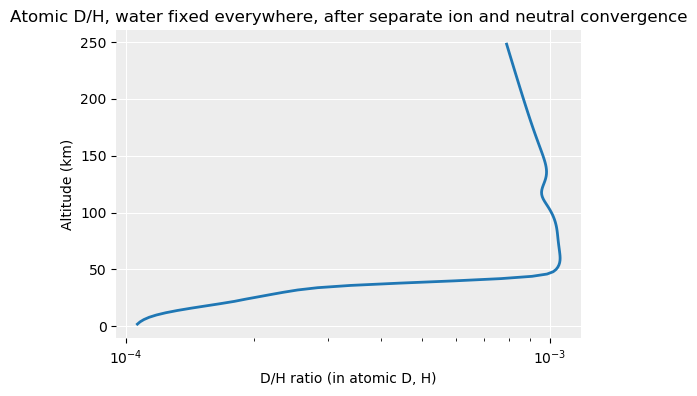

In [17]:
ncur_mean_withions = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Code/converged_full_ionosphere.h5")

DH_by_alt_with_ions = ncur_mean_withions[:D] ./ ncur_mean_withions[:H];

fig, ax = subplots(figsize=(6,4))
plot_bg(ax)
ax.set_xlabel("D/H ratio (in atomic D, H)")
ax.set_ylabel("Altitude (km)")

# do actual plotting
ax.plot(DH_by_alt_with_ions, plot_grid, linewidth=2)

# save it again but with log x-axis
ax.set_xscale("log")
ax.set_title("Atomic D/H, water fixed everywhere, after separate ion and neutral convergence")
# xticks(rotation=45)
show()

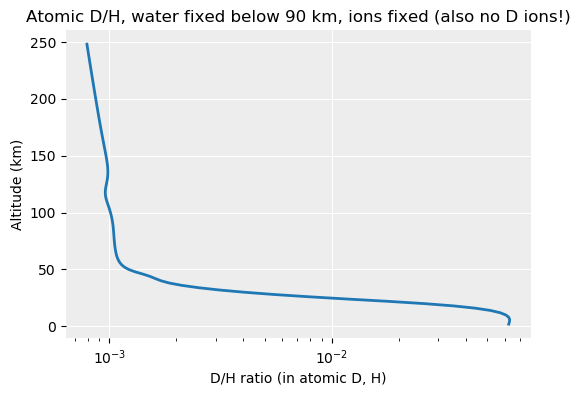

In [18]:
ncur_mean_freewater = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205_neutrals/ncurrent_1.0e6.h5")

DH_by_alt_freewater = ncur_mean_freewater[:D] ./ ncur_mean_freewater[:H];

fig, ax = subplots(figsize=(6,4))
plot_bg(ax)
ax.set_xlabel("D/H ratio (in atomic D, H)")
ax.set_ylabel("Altitude (km)")

# do actual plotting
ax.plot(DH_by_alt_freewater, plot_grid, linewidth=2)

# save it again but with log x-axis
ax.set_xscale("log")
ax.set_title("Atomic D/H, water fixed below 90 km, ions fixed (also no D ions!)")
# xticks(rotation=45)
show()

# Looking at disagreed reaction rates

In [2]:
function chem_rate_by_alt(ncur, krate, temps_n, temps_i, temps_e)
    #=
    This is basically just chem_rxns, but with all the density stuff removed.
    =#

    # Calculate the sum of all bodies in a layer (M) for third body reactions. 
    # This does it in an array so we can easily plot.
    M_by_alt = sum([ncur[sp] for sp in fullspecieslist]) 
    E_by_alt = sum([ncur[sp] for sp in ionlist])

    # WARNING: invokelatest is key to making this work. I don't really know how. At some point I did. WITCHCRAFT
    @eval ratefunc(Tn, Ti, Te, M, E) = $krate
    rate_arr = Base.invokelatest(ratefunc, temps_n, temps_i, temps_e, M_by_alt, E_by_alt)
    return rate_arr
end

chem_rate_by_alt (generic function with 1 method)

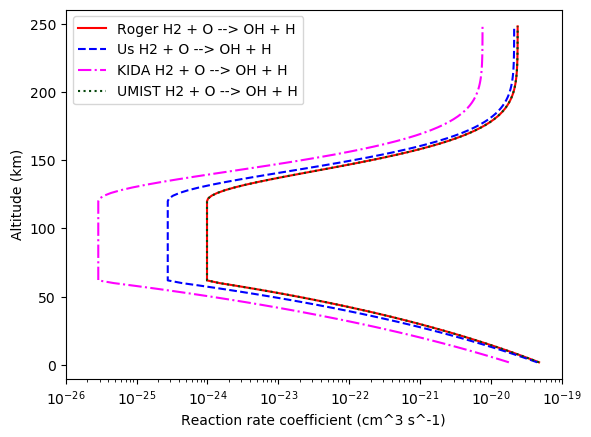

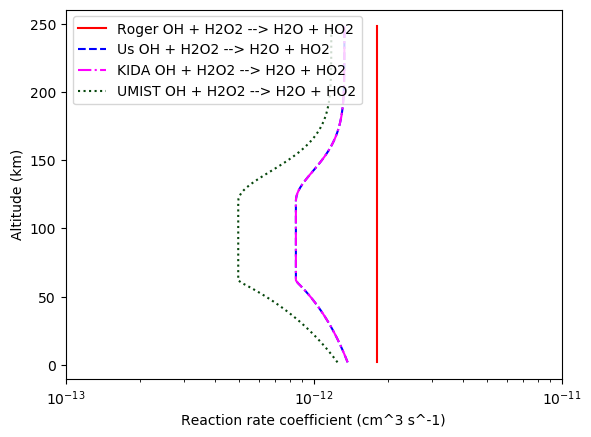

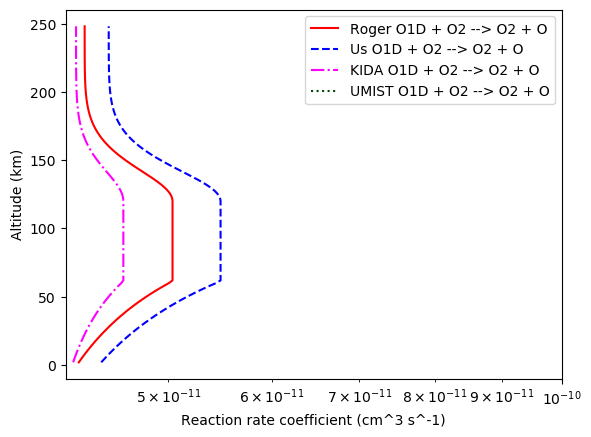

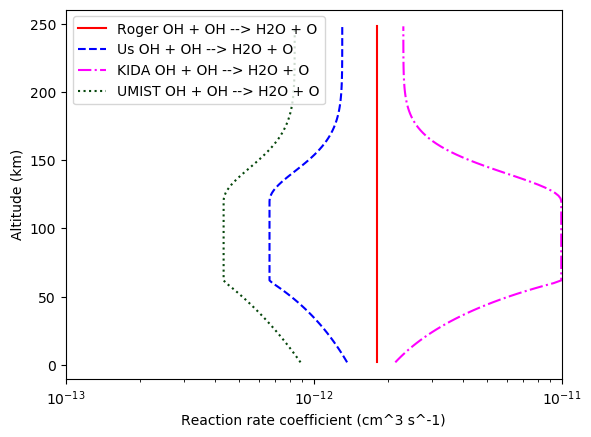

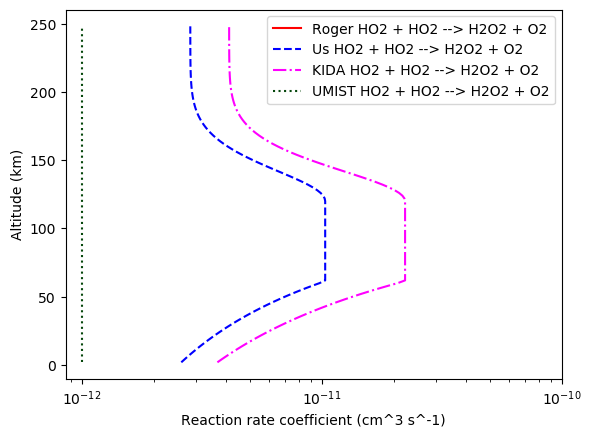

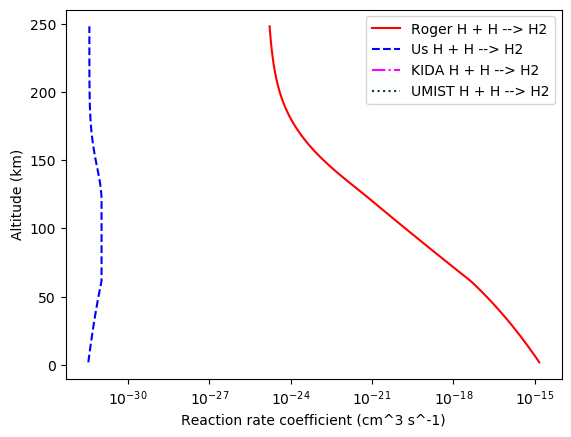

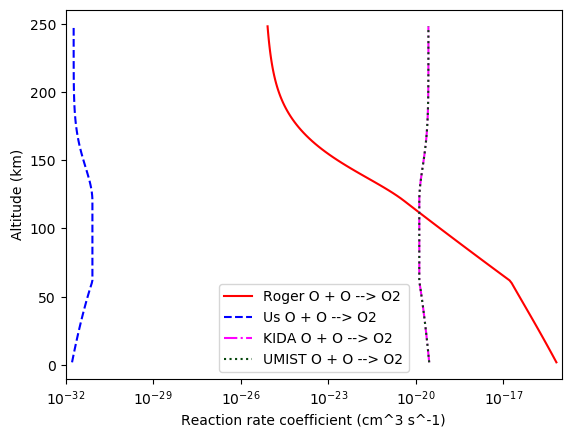

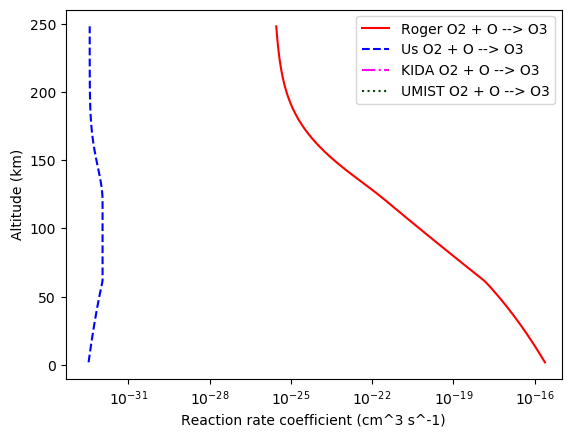

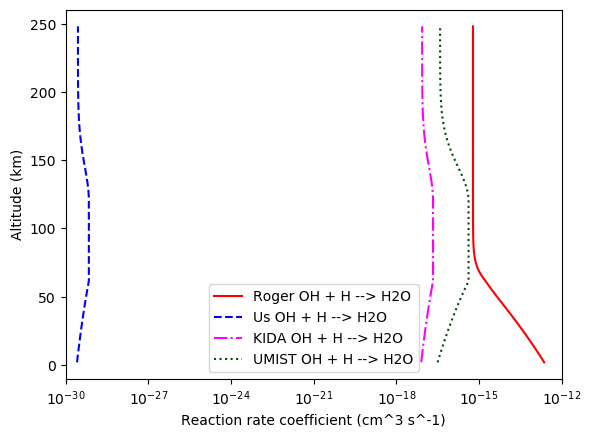

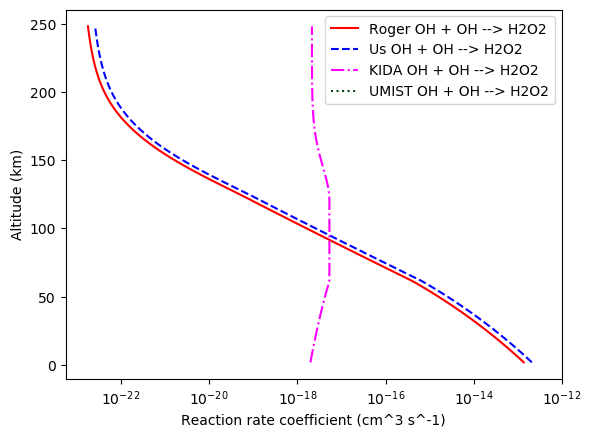

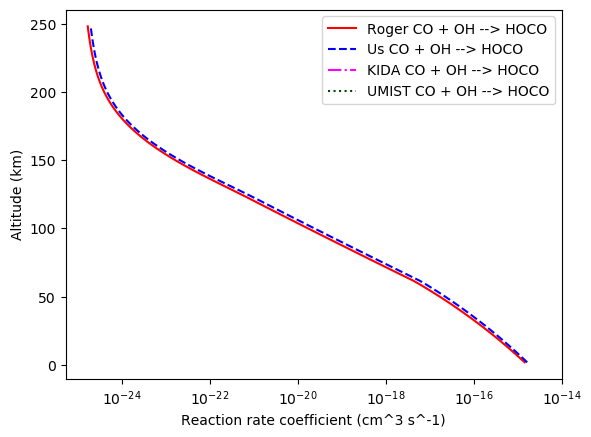

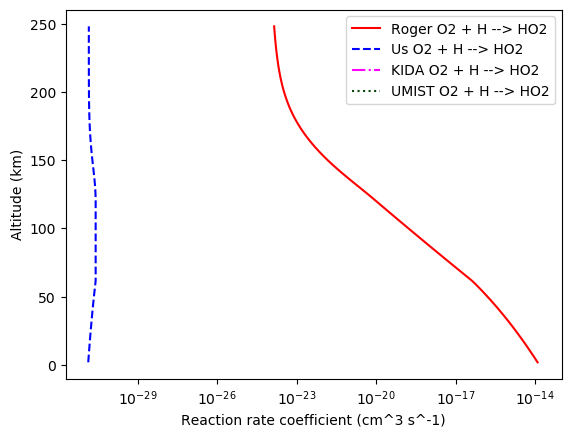

In [15]:
roger = [[[:H2, :O], [:OH, :H], :((6.44e-20 .* Tn .^ 2.7) .* exp.(-3150.0 ./ Tn))],
                [[:OH, :H2O2], [:H2O, :HO2], :(1.80e-12)],
                [[:O1D, :O2], [:O2, :O], :(3.30e-11 .* exp.(55.0 ./ Tn))],
                [[:OH, :OH], [:H2O, :O], :(1.80e-12)],
                [[:HO2, :HO2], [:H2O2, :O2], :(0)],
    
                # Type 4
                [[:H, :H], [:H2], :(min.($:(1.0 .* (Tn .^ -1.0)), $:(0.0 .+ (10 .^ ((log10.(0.4)) ./ (1 .+ ((log10.((1.8e-30 .* (Tn .^ -1.0) .* M) ./ (1.0 .* (Tn .^ -1.0))) .- 0.4 .- 0.67 .* log10.(0.4)) ./ (0.75 .- 1.27 .* log10.(0.4) .- 0.14 .* (log10.((1.8e-30 .* (Tn .^ -1.0) .* M) ./ (1.0 .* (Tn .^ -1.0))) .- 0.4 .- 0.67 .* log10.(0.4)))) .^ 2)) .* 1.8e-30 .* (Tn .^ -1.0) .* 1.0 .* (Tn .^ -1.0) .* M) ./ (1.8e-30 .* (Tn .^ -1.0) .* M .+ 1.0 .* (Tn .^ -1.0)))))],
                [[:O, :O], [:O2], :(0.0 .+ (5.21e-35 .* exp.(900.0 ./ Tn) .* 1.0 .* exp.(900.0 ./ Tn) .* M) ./ (5.21e-35 .* exp.(900.0 ./ Tn) .* M .+ 1.0 .* exp.(900.0 ./ Tn)))],
                [[:O2, :O], [:O3], :(min.($:(2.8e-12), $:(0.0 .+ (10 .^ ((log10.(0.65)) ./ (1 .+ ((log10.((5.29e-28 .* (Tn .^ -2.4) .* M) ./ (2.8e-12)) .- 0.4 .- 0.67 .* log10.(0.65)) ./ (0.75 .- 1.27 .* log10.(0.65) .- 0.14 .* (log10.((5.29e-28 .* (Tn .^ -2.4) .* M) ./ (2.8e-12)) .- 0.4 .- 0.67 .* log10.(0.65)))) .^ 2)) .* 5.29e-28 .* (Tn .^ -2.4) .* 2.8e-12 .* M) ./ (5.29e-28 .* (Tn .^ -2.4) .* M .+ 2.8e-12))))],
                [[:OH, :H], [:H2O], :(min.($:(1.0 .* (Tn .^ -2.0)), $:(6.0e-16 .+ (10 .^ ((log10.(0.4)) ./ (1 .+ ((log10.((6.1e-26 .* (Tn .^ -2.0) .* M) ./ (1.0 .* (Tn .^ -2.0))) .- 0.4 .- 0.67 .* log10.(0.4)) ./ (0.75 .- 1.27 .* log10.(0.4) .- 0.14 .* (log10.((6.1e-26 .* (Tn .^ -2.0) .* M) ./ (1.0 .* (Tn .^ -2.0))) .- 0.4 .- 0.67 .* log10.(0.4)))) .^ 2)) .* 6.1e-26 .* (Tn .^ -2.0) .* 1.0 .* (Tn .^ -2.0) .* M) ./ (6.1e-26 .* (Tn .^ -2.0) .* M .+ 1.0 .* (Tn .^ -2.0)))))],
                [[:OH, :OH], [:H2O2], :(min.($:(2.6e-11), $:(0.0 .+ (10 .^ ((log10.(0.5)) ./ (1 .+ ((log10.((6.6e-29 .* (Tn .^ -0.8) .* M) ./ (2.6e-11)) .- 0.4 .- 0.67 .* log10.(0.5)) ./ (0.75 .- 1.27 .* log10.(0.5) .- 0.14 .* (log10.((6.6e-29 .* (Tn .^ -0.8) .* M) ./ (2.6e-11)) .- 0.4 .- 0.67 .* log10.(0.5)))) .^ 2)) .* 6.6e-29 .* (Tn .^ -0.8) .* 2.6e-11 .* M) ./ (6.6e-29 .* (Tn .^ -0.8) .* M .+ 2.6e-11))))],
                
                # Type 5
                [[:CO, :OH], [:HOCO], threebody(:(1.77e-30 .* (Tn .^ -1.0)), :(6.62e-16 .* (Tn .^ 1.3)))],
                [[:O2, :H], [:HO2], threebody(:(7.31e-29 .* (Tn .^ -1.3)), :(2.4e-11 .* (Tn .^ 0.2)))]
]

us = [[[:H2, :O], [:OH, :H], :(6.34e-12 .* exp.(-4000 ./ Tn))],
              [[:OH, :H2O2], [:H2O, :HO2], :(2.9e-12 .* exp.(-160 ./ Tn))],
              [[:O1D, :O2], [:O, :O2], :(3.2e-11 .* exp.(70 ./ Tn))],
              [[:OH, :OH], [:H2O, :O], :(4.2e-12 .* exp.(-240 ./ Tn))],
              [[:HO2, :HO2], [:H2O2, :O2], :(3.0e-13 .* exp.(460 ./ Tn))],
    
              # Roger Type 4
              [[:H, :H, :M], [:H2, :M], :(1.6e-32 .* (298 ./ Tn) .^ 2.27)],
              [[:O, :O, :M], [:O2, :M], :(1.8 .* 3.0e-33 .* (300 ./ Tn) .^ 3.25)],
#               [[:O, :O2, :N2], [:O3, :N2], :(5e-35*exp(724 ./ Tn))], 
              [[:O, :O2, :CO2], [:O3, :CO2], :(2.5 .* 6.0e-34 .* (300 ./ Tn) .^ 2.4)],
              [[:OH, :H, :CO2], [:H2O, :CO2], :(1.9 .* 6.8e-31 .* (300 ./ Tn) .^ 2)],
              [[:OH, :OH], [:H2O2], threebody(:(1.3 .* 6.9e-31 .* (Tn ./ 300.) .^ -1.0), :(2.6e-11))],
    
              # Roger Type 5
              [[:OH, :CO], [:HOCO], threebody(:(5.9e-33 .* (Tn ./ 300.) .^ -1.4), :(1.1e-12 .* (Tn ./ 300.) .^ 1.3))],
              [[:O2, :H], [:HO2], :(2.0 .* 4.4e-32 .* (Tn ./ 300.) .^ -1.3)],
]

kida = [[[:H2, :O], [:OH, :H], :((6.34e-12 .* (Tn ./ 300) .^ 2.7) .* exp.(-4000.0 ./ Tn))],
                [[:OH, :H2O2], [:H2O, :HO2], :(2.9e-12 .* exp.(-160. ./ Tn))],
                [[:O1D, :O2], [:O2, :O], :(3.6e-11 .* ((Tn ./ 300) .^ 5.31e-2) .* exp.(38.2 ./ Tn))],
                [[:OH, :OH], [:H2O, :O], :(6.2e-14 .* ((Tn ./ 300) .^ 2.62) .* exp.(945 ./ Tn))],
                [[:HO2, :HO2], [:H2O2, :O2], :(2.2e-13 .* exp.(600 ./ Tn))],
    
                # Type 4
                [[:H, :H], [:H2], :(0)],
                [[:O, :O], [:O2], :(4.9e-20 .* (Tn ./ 300) .^ 1.58)],
                [[:O2, :O], [:O3], :(0)],
                [[:OH, :H], [:H2O], :(4e-18 .* (Tn ./ 300) .^ -2)],
                [[:OH, :OH], [:H2O2], :(1e-18 .* (Tn ./ 300) .^ -2)],
                
                # Type 5
                [[:CO, :OH], [:HOCO], :(0)],
                [[:O2, :H], [:HO2], :(0)]
     ]

umist = [[[:H2, :O], [:OH, :H], :((3.14e-13 .* (Tn ./ 300) .^ 2.7) .* exp.(-3150.0 ./ Tn))],
                [[:OH, :H2O2], [:H2O, :HO2], :(5.26e-12 .* exp.(-307. ./ Tn))],
                [[:O1D, :O2], [:O2, :O], :(0)],
                [[:OH, :OH], [:H2O, :O], :(1.65e-12 .* ((Tn ./ 300) .^ 1.14) .* exp.(-50 ./ Tn))],
                [[:HO2, :HO2], [:H2O2, :O2], :(1e-12)],
    
                # Type 4
                [[:H, :H], [:H2], :(0)],
                [[:O, :O], [:O2], :(4.9e-20 .* (Tn ./ 300) .^ 1.58)],
                [[:O2, :O], [:O3], :(0)],
                [[:OH, :H], [:H2O], :(5.26e-18 .* (Tn ./ 300) .^ -5.22)],
                [[:OH, :OH], [:H2O2], :(0)],
                
                # Type 5
                [[:CO, :OH], [:HOCO], :(0)],
                [[:O2, :H], [:HO2], :(0)]
     ]


Temp_n(z::Float64) = T_all(z, 216., 130., 205., "neutral")
Temp_i(z::Float64) = T_all(z, 216., 130., 205., "ion")
Temp_e(z::Float64) = T_all(z, 216., 130., 205., "electron")

Tn = map(Temp_n, alt[2:end-1]);
Ti = map(Temp_i, alt[2:end-1]);
Te = map(Temp_e, alt[2:end-1]);

ncur = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Code/converged_full_ionosphere.h5")

for (rxn1, rxn2, rxn3, rxn4) in zip(roger, us, kida, umist)
    rxn_str = string(join(rxn1[1], " + ")) * " --> " * string(join(rxn1[2], " + "))
    
    roger_rate_array = chem_rate_by_alt(ncur, rxn1[3], Tn, Ti, Te)
    us_rate_array = chem_rate_by_alt(ncur, rxn2[3], Tn, Ti, Te)
    kida_rate_array = chem_rate_by_alt(ncur, rxn3[3], Tn, Ti, Te)
    umist_rate_array = chem_rate_by_alt(ncur, rxn4[3], Tn, Ti, Te)
    
    if length(roger_rate_array)==1
        roger_rate_array = fill(1, 124) .* roger_rate_array
    end
    
    if length(us_rate_array)==1
        us_rate_array = fill(1, 124) .* us_rate_array
    end
    
    if length(kida_rate_array)==1
        kida_rate_array = fill(1, 124) .* kida_rate_array
    end
    
    if length(umist_rate_array)==1
        umist_rate_array = fill(1, 124) .* umist_rate_array
    end
    
    fig = figure()    
    plot(roger_rate_array, plot_grid, color="red", label="Roger "*rxn_str)
    plot(us_rate_array, plot_grid, color="blue", label="Us "*rxn_str, linestyle="--")
    plot(kida_rate_array, plot_grid, color="magenta", label="KIDA "*rxn_str, linestyle="-.")
    plot(umist_rate_array, plot_grid, color="xkcd:forest green", label="UMIST "*rxn_str, linestyle=":")
    
    minx_roger = 10^(floor(log10(minimum(roger_rate_array))))
    maxx_roger = 10^(ceil(log10(maximum(roger_rate_array))))
    
    minx_us = 10^(floor(log10(minimum(us_rate_array))))
    maxx_us = 10^(ceil(log10(maximum(us_rate_array))))
    
    minx_kida = 10^(floor(log10(minimum(kida_rate_array))))
    maxx_kida = 10^(ceil(log10(maximum(kida_rate_array))))
    
    minx_umist = 10^(floor(log10(minimum(umist_rate_array))))
    maxx_umist = 10^(ceil(log10(maximum(umist_rate_array))))
    
    min_opts = [minx_roger, minx_us, minx_kida, minx_umist]
    max_opts = [maxx_roger, maxx_us, maxx_kida, maxx_umist]
    minx = minimum(min_opts)
    maxx = maximum(max_opts)
    
    xscale("log")
    xlim(minx, maxx)
    xlabel("Reaction rate coefficient (cm^3 s^-1)")
    ylabel("Altitude (km)")
    legend()
    show()
#     close(fig)
end



# Do get_flux and total_H_or_D_flux do the same thing?

I had written a function, get_flux, which totaled up the flux of H from H, H2, and HD and of D from HD and D at the top of the atmosphere. For now I have renamed that total_H_or_D_flux. But now I have another get_flux, the one that I worked on extensively with Mike so I could calculate the right transport at each layer and add it to chemical production/loss. Presumably they both should produce the same results as long as I do get_flux(:H...) + get_flux(:HD...) + get_flux(:H2...) (where the ... means the other arguments, not a splat. I need to check this. I've loaded both into Photochemistry module.


## New work

In [3]:
n_current = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Code/converged_full_ionosphere.h5")
readfile = "/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Code/converged_full_ionosphere.h5" # some of the code takes the file, not ncurrent dictionary.

"/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Code/converged_full_ionosphere.h5"

In [4]:
T_surf = 216.0
T_tropo = 130.0
T_exo = 205.0

Temp_n(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "neutral")
Temp_i(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "ion")
Temp_e(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "electron")
Temp_keepSVP(z::Float64) = T_all(z, meanTs, meanTt, meanTe, "neutral") # for testing temp without changing SVP. #TODO: adjust if needed for ions?


fix_SVP = true
H2Osat = map(x->Psat(x), map(Temp_keepSVP, alt))
HDOsat = map(x->Psat_HDO(x), map(Temp_keepSVP, alt))

# H2O Water Profile ============================================================
surface_watersat = Dict("H2O"=>H2Osat[1], "HDO"=>HDOsat[1])
H2Osatfrac = H2Osat./map(z->n_tot(n_current, z), alt)  # get SVP as fraction of total atmo
# set H2O SVP fraction to minimum for all alts above first time min is reached
H2Oinitfrac = H2Osatfrac[1:something(findfirst(isequal(minimum(H2Osatfrac)), H2Osatfrac), 0)]
H2Oinitfrac = [H2Oinitfrac;   # ensures no supersaturation
               fill(minimum(H2Osatfrac), num_layers-length(H2Oinitfrac))]

MR = MR_mean_water
H2Oinitfrac[findall(x->x<hygropause_alt, alt)] .= MR # 10 pr μm

for i in [1:length(H2Oinitfrac);]
    H2Oinitfrac[i] = H2Oinitfrac[i] < H2Osatfrac[i+1] ? H2Oinitfrac[i] : H2Osatfrac[i+1]
end

# HDO water profile ============================================================
HDOsatfrac = HDOsat./map(z->n_tot(n_current, z), alt)
# use D/H ratio to set population of HDO
HDOinitfrac = H2Oinitfrac * DH  # initial profile for HDO

H_veff = effusion_velocity(Temp_n(zmax), 1.0, zmax)
H2_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
D_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
HD_veff = effusion_velocity(Temp_n(zmax), 3.0, zmax)

global const speciesbclist=Dict(
                :CO2=>["n" 2.1e17; "f" 0.],
                :Ar=>["n" 2.0e-2*2.1e17; "f" 0.],
                :N2=>["n" 1.9e-2*2.1e17; "f" 0.],
                :H2O=>["n" H2Osat[1]; "f" 0.], # bc doesnt matter if H2O fixed
                :HDO=>["n" HDOsat[1]; "f" 0.],
                :O=>["f" 0.; "f" 1.2e8],
                :H2=>["f" 0.; "v" H2_veff],  # velocities are in cm/s
                :HD=>["f" 0.; "v" HD_veff],
                :H=>["f" 0.; "v" H_veff],
                :D=>["f" 0.; "v" D_veff],
                # TODO: Ion boundary conditions?
               );


In [5]:
total_H_or_D_flux(:H, readfile, [216., 130., 205.], speciesbclist, therm_only=true)[1]


the boundary condition being multiplied for H: 401.61387684149963
the boundary condition being multiplied for HD: 0.0006056893814626976
the boundary condition being multiplied for H2: 0.518861995476794


3.3138869990127034e9

In [6]:
get_flux(n_current, :H, [216., 130., 205.], speciesbclist)[end] + 2*get_flux(n_current, :H2, [216., 130., 205.], speciesbclist)[end] + get_flux(n_current, :HD, [216., 130., 205.], speciesbclist)[end]

3.3138869990127034e9

In [7]:
total_H_or_D_flux(:D, readfile, [216., 130., 205.], speciesbclist, therm_only=true)[1]


the boundary condition being multiplied for D: 0.518861995476794
the boundary condition being multiplied for HD: 0.0006056893814626976


3387.190198006075

In [8]:
get_flux(n_current, :D, [216., 130., 205.], speciesbclist)[end] + get_flux(n_current, :HD, [216., 130., 205.], speciesbclist)[end]

3387.1901980060757

Okay those numbers are the same for each function, which is nice, which means I don't need the total_H_and_D_flux function.

But H is weirdly high... what if I use a file from the previous work?

## Previous work

This requires loading the old parameter file :/

In [2]:
include("/home/emc/GDrive-CU/Research-Modeling/FractionationFactor/Code/PARAMETERS.jl");

In [8]:
readfile2 = "/home/emc/GDrive-CU/Research-Modeling/FractionationFactor/Code/Results/MainCases/temp_216_130_205/converged_temp_216_130_205.h5"
ncur2 = get_ncurrent(readfile2);

T_surf = 216.0
T_tropo = 130.0
T_exo = 205.0

Temp_n(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "neutral")
Temp_i(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "ion")
Temp_e(z::Float64) = T_all(z, T_surf, T_tropo, T_exo, "electron")
Temp_keepSVP(z::Float64) = T_all(z, meanTs, meanTt, meanTe, "neutral") # for testing temp without changing SVP. #TODO: adjust if needed for ions?


fix_SVP = true
H2Osat = map(x->Psat(x), map(Temp_keepSVP, alt))
HDOsat = map(x->Psat_HDO(x), map(Temp_keepSVP, alt))

# H2O Water Profile ============================================================
surface_watersat = Dict("H2O"=>H2Osat[1], "HDO"=>HDOsat[1])
H2Osatfrac = H2Osat./map(z->n_tot(ncur2, z), alt)  # get SVP as fraction of total atmo
# set H2O SVP fraction to minimum for all alts above first time min is reached
H2Oinitfrac = H2Osatfrac[1:something(findfirst(isequal(minimum(H2Osatfrac)), H2Osatfrac), 0)]
H2Oinitfrac = [H2Oinitfrac;   # ensures no supersaturation
               fill(minimum(H2Osatfrac), length(alt)-2-length(H2Oinitfrac))]

MR = MR_mean_water
H2Oinitfrac[findall(x->x<hygropause_alt, alt)] .= MR # 10 pr μm

for i in [1:length(H2Oinitfrac);]
    H2Oinitfrac[i] = H2Oinitfrac[i] < H2Osatfrac[i+1] ? H2Oinitfrac[i] : H2Osatfrac[i+1]
end

# HDO water profile ============================================================
HDOsatfrac = HDOsat./map(z->n_tot(ncur2, z), alt)
# use D/H ratio to set population of HDO
HDOinitfrac = H2Oinitfrac * DH  # initial profile for HDO

H_veff = effusion_velocity(Temp_n(zmax), 1.0, zmax)
H2_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
D_veff = effusion_velocity(Temp_n(zmax), 2.0, zmax)
HD_veff = effusion_velocity(Temp_n(zmax), 3.0, zmax)

global const speciesbclist=Dict(
                :CO2=>["n" 2.1e17; "f" 0.],
                :Ar=>["n" 2.0e-2*2.1e17; "f" 0.],
                :N2=>["n" 1.9e-2*2.1e17; "f" 0.],
                :H2O=>["n" H2Osat[1]; "f" 0.], # bc doesnt matter if H2O fixed
                :HDO=>["n" HDOsat[1]; "f" 0.],
                :O=>["f" 0.; "f" 1.2e8],
                :H2=>["f" 0.; "v" H2_veff],  # velocities are in cm/s
                :HD=>["f" 0.; "v" HD_veff],
                :H=>["f" 0.; "v" H_veff],
                :D=>["f" 0.; "v" D_veff],
                # TODO: Ion boundary conditions?
               );


In [9]:
total_H_or_D_flux(:H, readfile2, [216., 130., 205.], speciesbclist, therm_only=true)#[1]

the boundary condition being multiplied for H: 401.61387684149963
the boundary condition being multiplied for HD: 0.0006056893814626976
the boundary condition being multiplied for H2: 0.518861995476794


(2.3999979791253918e8, Dict(:H => 2.395829596921816e8,:D => 0.0,:H2 => 416838.05390886497,:HD => 0.16644874837351))

In [10]:
get_flux(ncur2, :H, [216., 130., 205.], speciesbclist)[end] + 2*get_flux(ncur2, :H2, [216., 130., 205.], speciesbclist)[end] + get_flux(ncur2, :HD, [216., 130., 205.], speciesbclist)[end]

LoadError: UndefVarError: non_bdy_layers not defined

Okay that one's busted but the previous one works, so we are good here. I guess it indicates that there's some issue with the converged file--it may be in equilibrium but the H flux is suspiciously large. Why might that be?

## Code to add a bunch of D to the neutral simulation and seeing how long it takes to return to equilbrium

For this we need to get a piece of code to add a parcel up high. I can steal it from Mike's old code.

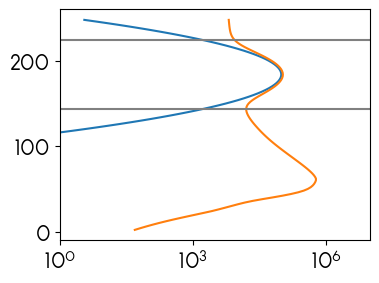

In [67]:
detachedlayer = map(x->1e5*exp(-((x-updownline)/20)^2), non_bdy_layers/1e5)# + ncur[:D]

fig = figure(figsize=(4,3))
plot(detachedlayer, plot_grid)
plot(detachedlayer+ncur[:D], plot_grid)
xscale("log")
xlim(1e0, 1e7)
axhline(184+40, color="gray")
axhline(184-40, color="gray")
show()

## Make some selected species plots after adding extra D to the atmo

In [13]:
# this is here because I did some dumb shit with ctrl+F and "n_current" and "ncur"
function get_ncur(readfile::String)
    #=
    Retrieves the matrix of species concentrations by altitude from an HDF5
    file, readfile, containing a converged atmosphere.
    =#
    n_current_tag_list = map(Symbol, h5read(readfile,"ncur/species"))
    n_current_mat = h5read(readfile,"ncur/ncur_mat");
    n_current = Dict{Symbol, Array{Float64, 1}}()

    for ispecies in [1:length(n_current_tag_list);]
        n_current[n_current_tag_list[ispecies]] = reshape(n_current_mat[:,ispecies], length(n_current_mat[:, ispecies]))
    end
    return n_current
end

get_ncur (generic function with 1 method)

In [33]:
ncur_init = get_ncur("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/ncurrent_0.001.h5");
ncur_mid = get_ncur("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/ncurrent_10000.0.h5");
ncur_end = get_ncur("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/ncurrent_100000.0.h5");

In [76]:
detachedlayer = map(x->1e5*exp(-((x-184)/20)^2), non_bdy_layers/1e5);

i_dl = n_alt_index[184e5]
sum_dl = sum(detachedlayer[i_dl-20:i_dl+20])

1.7658724446799953e6

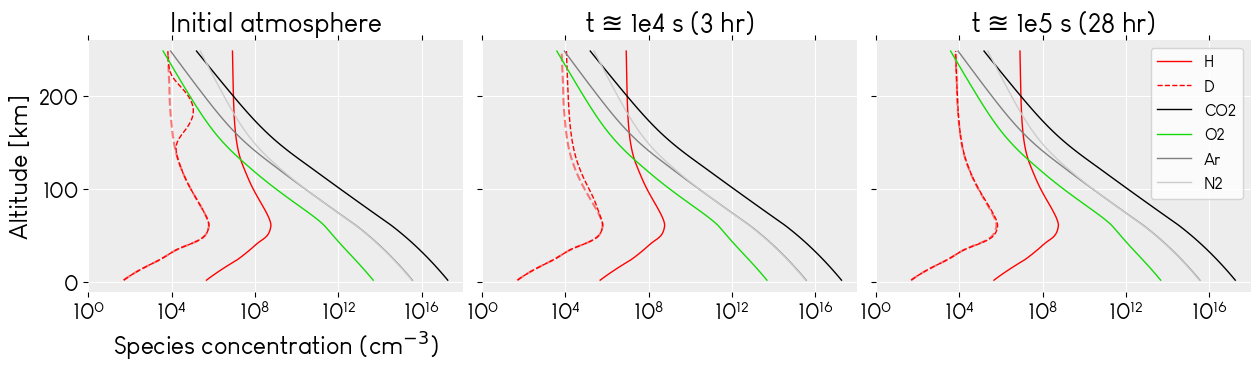

In [83]:
rcParams = PyCall.PyDict(matplotlib."rcParams")
rcParams["font.sans-serif"] = ["Louis George Caf?"]
rcParams["font.monospace"] = ["FreeMono"]
rcParams["font.size"] = 16
rcParams["axes.labelsize"]= 18
rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

atm_fig, ax = subplots(1, 3, sharey=true, sharex=true, figsize=(15,4))
subplots_adjust(wspace=0.05, bottom=0.25)

for a in ax
    plot_bg(a)
    a.set_xlim(1e0, 1e18)
    a.tick_params(which="both", labeltop=false, top=true, labelbottom=true, bottom=true)
    a.set_xscale("log")
    # plot the original D profile without the parcel
    a.plot(ncur_init[:D] - detachedlayer, plot_grid, color="red", alpha=0.5, linestyle=get(speciesstyle, :D, "-"))
end

ax[1].set_xlabel(L"Species concentration (cm$^{-3}$)")
ax[1].set_ylabel("Altitude [km]")

# plot the neutrals according to logical groups -------------------------------------------------------
for sp in [:H, :D, :CO2, :O2, :Ar, :N2]
    ax[1].plot(ncur_init[sp], plot_grid, color=get(speciescolor, sp, "black"), linewidth=1, label=sp, linestyle=get(speciesstyle, sp, "-"), zorder=10)
    ax[2].plot(ncur_mid[sp], plot_grid, color=get(speciescolor, sp, "black"), linewidth=1, label=sp, linestyle=get(speciesstyle, sp, "-"), zorder=10)
    ax[3].plot(ncur_end[sp], plot_grid, color=get(speciescolor, sp, "black"), linewidth=1, label=sp, linestyle=get(speciesstyle, sp, "-"), zorder=10)
end
ax[1].set_title("Initial atmosphere")
ax[2].set_title(L"t $\approxeq$ 1e4 s (3 hr)")
ax[3].set_title(L"t $\approxeq$ 1e5 s (28 hr)")

ax[3].legend(fontsize=12)#bbox_to_anchor=[1.01,1], loc=2, borderaxespad=0)
show()

Hmm this is longer than anticipated. Perhaps the reason is that there are lots of atoms that need to diffuse?

In [77]:
println(escape_timescale * sum_dl)
println(transport_timescale * sum_dl)

1.3378210082261472e9
7.001205468086535e9


Uhhh well that's way longer than indicated in the plots so nope that's not it.

# Plot of initial conditions with D ions in there

This is just a plot for a talk. It isn't meant to represent any real state of the atomsphere.

In [8]:
ncur_Dions = get_ncurrent("/home/emc/GDrive-CU/Research-Modeling/UpperAtmoDH/Results/temp_216_130_205/initial_state.h5");
ncur_Dions[:ArDpl] = ncur_Dions[:ArHpl] * DH;
ncur_Dions[:Dpl] = ncur_Dions[:Hpl] * DH;
ncur_Dions[:DCOpl] = ncur_Dions[:HCOpl] * DH;
ncur_Dions[:HDpl] = ncur_Dions[:H2pl] * DH;
ncur_Dions[:HD2pl] = 0.7 * ncur_Dions[:H3pl] * DH;
ncur_Dions[:H2Dpl] = 0.3 * ncur_Dions[:H3pl] * DH;
ncur_Dions[:N2Dpl] = ncur_Dions[:N2Hpl] * DH;

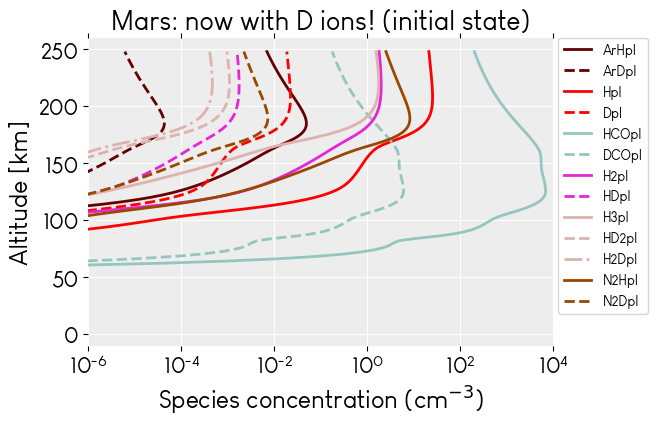

In [18]:
rcParams = PyCall.PyDict(matplotlib."rcParams")
rcParams["font.sans-serif"] = ["Louis George Caf?"]
rcParams["font.monospace"] = ["FreeMono"]
rcParams["font.size"] = 16
rcParams["axes.labelsize"]= 18
rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

atm_fig, ax = subplots(figsize=(6,4))

plot_bg(ax)
ax.set_xlim(1e-6, 1e4)
ax.tick_params(which="both", labeltop=false, top=true, labelbottom=true, bottom=true)
ax.set_xlabel(L"Species concentration (cm$^{-3}$)")
ax.set_ylabel("Altitude [km]")

for sp in [:ArHpl, :ArDpl, :Hpl, :Dpl, :HCOpl, :DCOpl, :H2pl, :HDpl, :H3pl, :HD2pl, :H2Dpl, :N2Hpl, :N2Dpl]
    ax.plot(ncur_Dions[sp], plot_grid, color=get(speciescolor, sp, "black"), linewidth=2, label=sp, linestyle=get(speciesstyle, sp, "-"), zorder=10)
end

# stuff that applies to all axes
ax.set_xscale("log")
ax.set_title("Mars: now with D ions! (initial state)")
ax.legend(fontsize=10, bbox_to_anchor=[1.01,1], loc=2, borderaxespad=0)
show()